In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

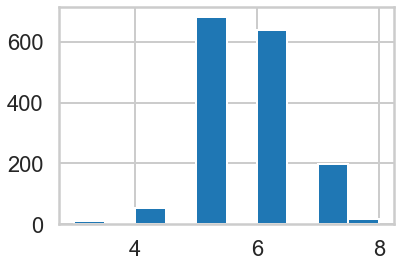

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\home\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.14181438998957246
% Good wines in Testing: 0.1265625


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 5, 'min_samples_leaf': 4} 0.34632464473360564 {'mean_fit_time': array([0.00110097, 0.0015007 , 0.00160136, 0.00150104, 0.00140138,
       0.00169988, 0.0013021 , 0.0012002 , 0.0016017 , 0.00130076,
       0.00150251, 0.00150084, 0.00130014, 0.00140119, 0.00130072,
       0.001301  , 0.00100102, 0.00130129, 0.00130081, 0.00150127,
       0.00510359, 0.00120087, 0.00460386, 0.00150104, 0.0014008 ,
       0.00180082, 0.00440302, 0.00150084, 0.00490394, 0.0016006 ,
       0.00150065, 0.0015008 , 0.00170107, 0.00150065, 0.00170107,
       0.00160136, 0.00180106, 0.00189967, 0.00179973, 0.00190058,
       0.00200114, 0.001401  ]), 'std_fit_time': array([2.00057392e-04, 6.31317156e-04, 3.74380781e-04, 5.46902836e-04,
       8.00753726e-04, 5.08473295e-04, 3.99286809e-04, 2.45479224e-04,
       3.74549290e-04, 2.45344622e-04, 3.18094098e-04, 3.16962092e-04,
       2.44543155e-04, 2.00152589e-04, 2.44814977e-04, 2.45145475e-04,
       4.67203091e-07, 2.45575210e-04

c:\users\home\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


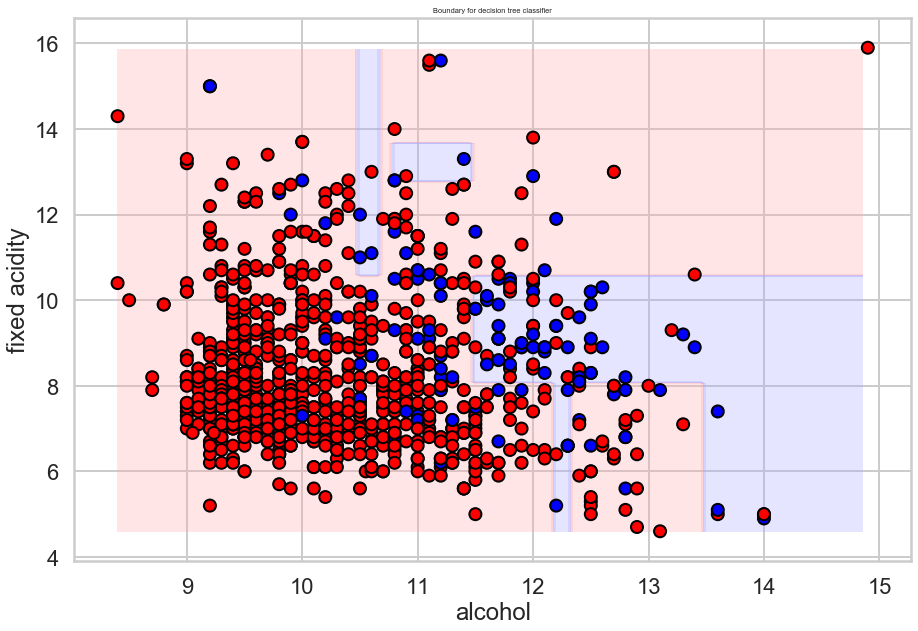

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

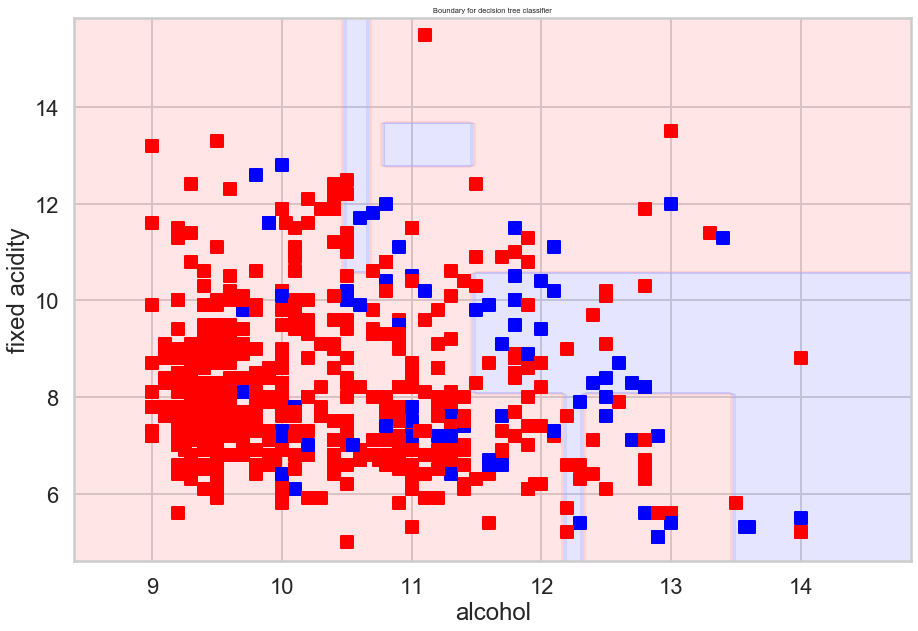

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 4} 0.27667874753842997 {'mean_fit_time': array([0.00170107, 0.00170202, 0.00180058]), 'std_fit_time': array([0.00024503, 0.00040069, 0.00039973]), 'mean_score_time': array([0.00230184, 0.00190234, 0.00180225]), 'std_score_time': array([0.00067895, 0.00019836, 0.00040033]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.27777778, 0.17142857, 0.18181818]), 'split1_test_score': array([0.29032258, 0.36842105, 0.35897436]), 'split2_test_score': array([0.38095238, 0.25641026, 0.15789474]), 'split3_test_score': array([0.3125

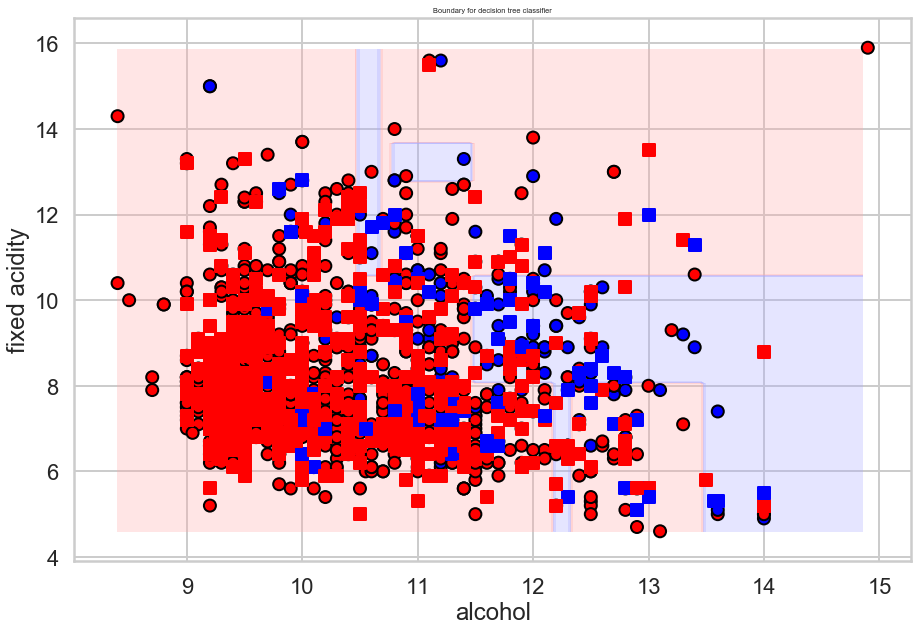

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 5, 'min_samples_leaf': 9} 0.38911684290400567 {'mean_fit_time': array([0.00250163, 0.00210085, 0.0018024 , 0.00230241, 0.00200071,
       0.00180192, 0.00300274, 0.00240116, 0.00170002, 0.00240316,
       0.00270343, 0.00360217, 0.00290041, 0.00270219, 0.00310078,
       0.00350513, 0.00780525, 0.00330195, 0.00470119, 0.002702  ,
       0.00320196, 0.00390215, 0.00410457, 0.00420384, 0.0040029 ,
       0.00710487, 0.0037025 , 0.00370197, 0.00310197, 0.01431003,
       0.00540361, 0.00780578, 0.01430964, 0.00670514, 0.00490332,
       0.00680494, 0.00620427, 0.00410233, 0.00930681, 0.01361151,
       0.00560365, 0.00520377, 0.00620437, 0.00980625, 0.00500283,
       0.00650454, 0.00710506, 0.00760531, 0.00540404, 0.00520439,
       0.00740581, 0.00540314, 0.00870609, 0.00840578, 0.00520382,
       0.00820589, 0.00840602, 0.00540423, 0.00710487, 0.00480318,
       0.00950675, 0.00720539, 0.00900578, 0.00600381, 0.00790496,
       0.01230826, 0.00730696, 0.00

c:\users\home\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 5} 0.4113861740706986 {'mean_fit_time': array([0.00450263, 0.00890594, 0.02111654, 0.01910839, 0.02741456,
       0.03892384, 0.04343095, 0.04233046, 0.04623303, 0.04963579,
       0.05524015, 0.05170913, 0.05113506, 0.07445207, 0.05981402,
       0.07275281, 0.06791816, 0.07355227, 0.07465296]), 'std_fit_time': array([0.00054829, 0.00102119, 0.01225174, 0.00727303, 0.00748046,
       0.01299998, 0.01232691, 0.00794698, 0.00587426, 0.0089572 ,
       0.00821323, 0.00932084, 0.0064486 , 0.01377355, 0.00816697,
       0.01415648, 0.00472391, 0.01232553, 0.00931991]), 'mean_score_time': array([0.00290213, 0.00380249, 0.00380216, 0.00790615, 0.00410318,
       0.00400233, 0.00570407, 0.00460334, 0.00470281, 0.00600414,
       0.00837646, 0.00470362, 0.00550399, 0.00630512, 0.00910664,
       0.00800476, 0.01591191, 0.00630426, 0.01160836]), 'std_score_time': array([0.00058349, 0.00128952, 0.00081265, 0.00957472, 0.00149799,
       0.00077525, 0.00392177, 0.

c:\users\home\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


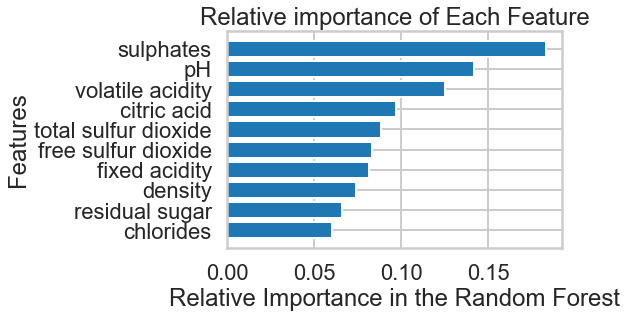

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 10} 0.4666644153884433 {'mean_fit_time': array([0.0431304 , 0.07095084, 0.06624694, 0.06494608, 0.06745028,
       0.07895598, 0.07545323, 0.0865622 , 0.08506012, 0.08896384,
       0.09194179, 0.10995398, 0.12066231, 0.11187987, 0.14300089,
       0.13679738, 0.13259406, 0.15080833, 0.1496439 , 0.14960709,
       0.13907495, 0.15541081, 0.15180602, 0.16311474, 0.15771303,
       0.16771803, 0.16331663, 0.16071448, 0.16831999, 0.1801281 ,
       0.17112126, 0.17952781, 0.18012748, 0.1873333 , 0.18973575,
       0.22583394, 0.23253932, 0.2252605 , 0.21655488, 0.22325163,
       0.23320937, 0.30824976, 0.29612756, 0.24751992, 0.24647532,
       0.25458064, 0.25508127, 0.29090643, 0.27460337, 0.26142263]), 'std_fit_time': array([0.01463696, 0.01458173, 0.00833446, 0.00911344, 0.01964417,
       0.01009417, 0.00848753, 0.02083027, 0.01490097, 0.01053477,
       0.01234695, 0.00415481, 0.00391692, 0.01542757, 0.03382298,
       0.0163504 , 0.01648543, 0.0226

c:\users\home\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\home\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 5, 'n_estimators': 58} 0.44562012162751174 {'mean_fit_time': array([0.08806262, 0.05473847, 0.05153646, 0.05473857, 0.05944223,
       0.05243754, 0.05563908, 0.04893489, 0.05373821, 0.0551394 ,
       0.05553994, 0.06234474, 0.06404519, 0.06454606, 0.06834826,
       0.07753487, 0.07379193, 0.0873652 , 0.11673861, 0.08628964,
       0.09259367, 0.07395267, 0.06864862, 0.0746532 , 0.0783555 ,
       0.06995077, 0.06964984, 0.07174239, 0.07114024, 0.08543987,
       0.06074371, 0.05974274, 0.05393867, 0.07429724, 0.07612548,
       0.0738234 , 0.07015004, 0.06904917, 0.07795529, 0.07545404,
       0.07595468, 0.07705669, 0.08135796, 0.0788558 , 0.07585378,
       0.10790358, 0.10808816, 0.09606705, 0.099471  , 0.10467386,
       0.10877643, 0.12200413, 0.11249809, 0.11551905, 0.10548825,
       0.12119308, 0.11328669, 0.11448164, 0.13945627, 0.13319516,
       0.11729698, 0.15313368, 0.11339259, 0.12247491, 0.10915294,
       0.10757728, 0.10767574, 0.11831875, 0.1174

############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.90
[[543  16]
 [ 46  35]]
########################################################


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

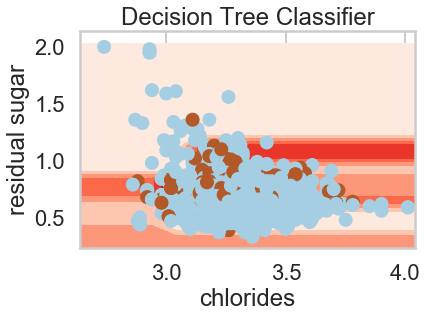

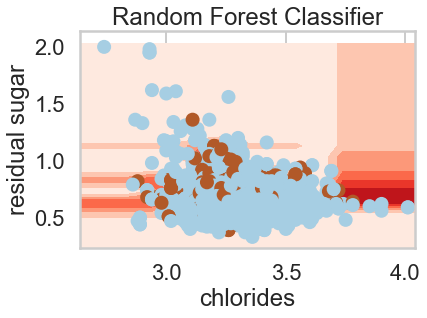

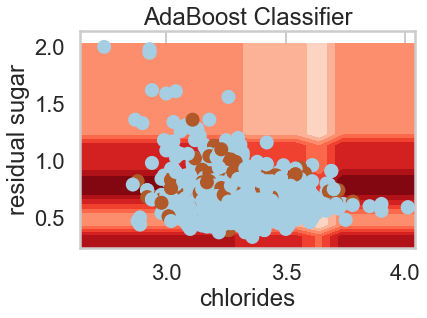

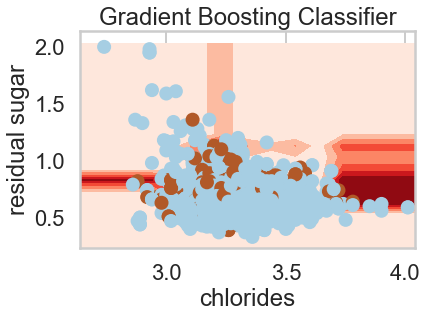

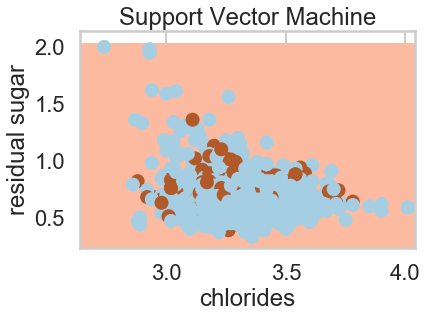

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1569    0
1570    0
1571    0
1572    0
1573    0
1574    0
1575    0
1576    0
1577    0
1578    0
1579    0
1580    0
1581    0
1582    0
1583    0
1584    1
1585    0
1586    0
1587    0
1588    0
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32